In [28]:
%matplotlib inline
import numpy as np
import pandas as pd

In [29]:
# Window functions are like aggregation functions 
# you can use them in conjunction with .resample() which will soon be a deferred operation 


In [30]:
df = pd.DataFrame(np.random.randn(600,3), index = pd.date_range('7/1/2016', freq = 'S',periods = 600), columns = ['A','B','C'])

In [34]:
pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample seperately 

C:\Users\APasham\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  """Entry point for launching an IPython kernel.


,A,B,C
2016-07-01 00:00:01,-0.385425,-0.789731,0.843277
2016-07-01 00:00:02,-0.934744,0.514001,-0.222099
2016-07-01 00:00:03,-0.073594,0.020951,0.363327
2016-07-01 00:00:04,-0.244285,-0.420098,1.402584
2016-07-01 00:00:05,-0.961396,0.219858,0.456834
2016-07-01 00:00:06,-0.485957,0.507599,1.167675
2016-07-01 00:00:07,-0.501601,0.405738,0.772895
2016-07-01 00:00:08,-1.163916,0.423696,-0.223289
2016-07-01 00:00:09,-0.298928,0.833682,-0.415438


In [35]:
r = df.rolling(window = 10)

In [38]:
r

Rolling [window=10,center=False,axis=0]

In [10]:
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var

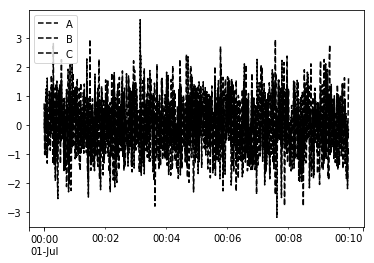

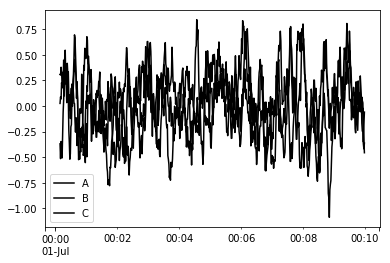

In [13]:
df.plot(style = 'k--')
r.mean().plot(style = 'k')

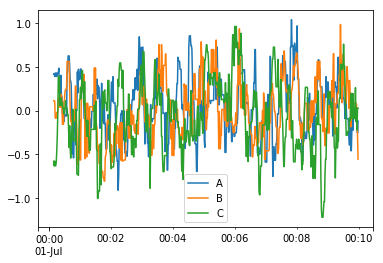

In [14]:
r.quantile(.5).plot()

In [16]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\APasham\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,span=15,min_periods=2,adjust=True).mean()
  


,A,B,C
2016-07-01 00:00:01,0.567169,0.137656,-0.182663
2016-07-01 00:00:02,-0.033333,0.184563,-0.176660
2016-07-01 00:00:03,0.154309,0.397079,0.032090
2016-07-01 00:00:04,0.065241,0.616009,-0.135916
2016-07-01 00:00:05,0.235634,0.413539,-0.251304
2016-07-01 00:00:06,-0.081910,0.662789,-0.418342
2016-07-01 00:00:07,0.006393,0.511078,-0.480727
2016-07-01 00:00:08,-0.102847,0.289579,-0.428564
2016-07-01 00:00:09,-0.007452,0.233776,-0.447100


In [17]:
df = pd.DataFrame(np.random.randn(1000,4), index = pd.date_range('6/6/16',periods = 1000),columns = ['A','B','C','D'])

In [18]:
df.head()

,A,B,C,D
2016-06-06,-0.675898,-0.884975,-0.946887,0.773007
2016-06-07,1.446616,-0.459089,-0.597319,0.601181
2016-06-08,0.747694,0.981697,1.361397,-0.461036
2016-06-09,-0.820292,0.460131,-1.191552,0.638818
2016-06-10,1.903454,1.341066,-0.338063,-1.557951


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D138048>,
      dtype=object)

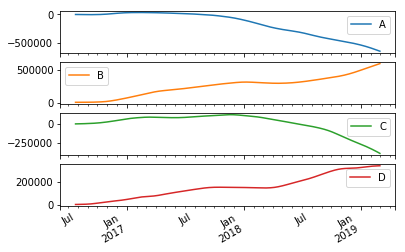

In [20]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots = True)

In [21]:
#what about a custom function?
df.rolling(window = 10).apply(lambda x:np.fabs(x-x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,3.882014,7.122205,3.628535,1.101493


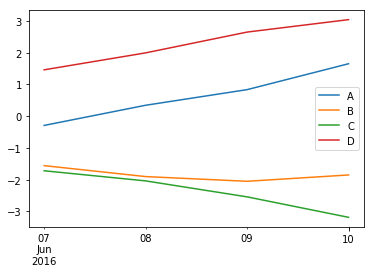

In [24]:
#Expanding windows 
# yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5].plot()